## Random Forests

Random Forest is a good choice of model when you are unsure of a good initial model for particular data set and modeling situation. 
This model, similar to techniques such as ANOVA and MANOVA, will aid in your exploration of wide data.
This exploration will help guide your selection of features and potentially choice in more complex models you apply on a dataset. 

Random Forests are capable of performing both regression and classification tasks. 
It helps in dimension reduction, handles missing values, accommodates outlier values and other 
essential steps of data exploration. Here, we will mainly use it to rank the variables with respect to importance. 

Before trying to get into the details of random forest, first review how how decision trees work.

**Decision trees** are a type of supervised learning algorithm mostly used in classification problems. 
It works for both categorical and continuous input and output variables. 
The main idea behind algorithm is to split the population or sample into two or more sub-populations 
based on a most significant differentiator in input variables.

<img src="../images/decision_tree.png">


image source: [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/)

**Example:** 
Consider a problem of predicting whether a customer will pay his loan debt amount: either yes or no. 
The income of the customer is the deciding variable in this case. 
But the company doesn't have income details of all customers. 
Based on the insight that income drives this decision; 
a decision tree can be built to predict customer's income based on occupation, 
education level and sex and various other variables. 
Here a continuous variable is being predicted, income.


A regular decision tree builds a single tree whether if its classification or regression using CART model(),
but **Random Forest** algorithm builds multiple trees. 
A random forest can be built to classify an object based on attributes, 
each tree that is built gives a classification and votes for a class. 
The forest chooses the classification having the most votes (over all the trees in the forest) 
and in case of regression, 
it takes the average of outputs by different trees.

We can illustrate this idea with iris dataset and compare the results. 
First, we will load the default iris dataset.

In [1]:
iris_data=(data=iris)
head(iris_data)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


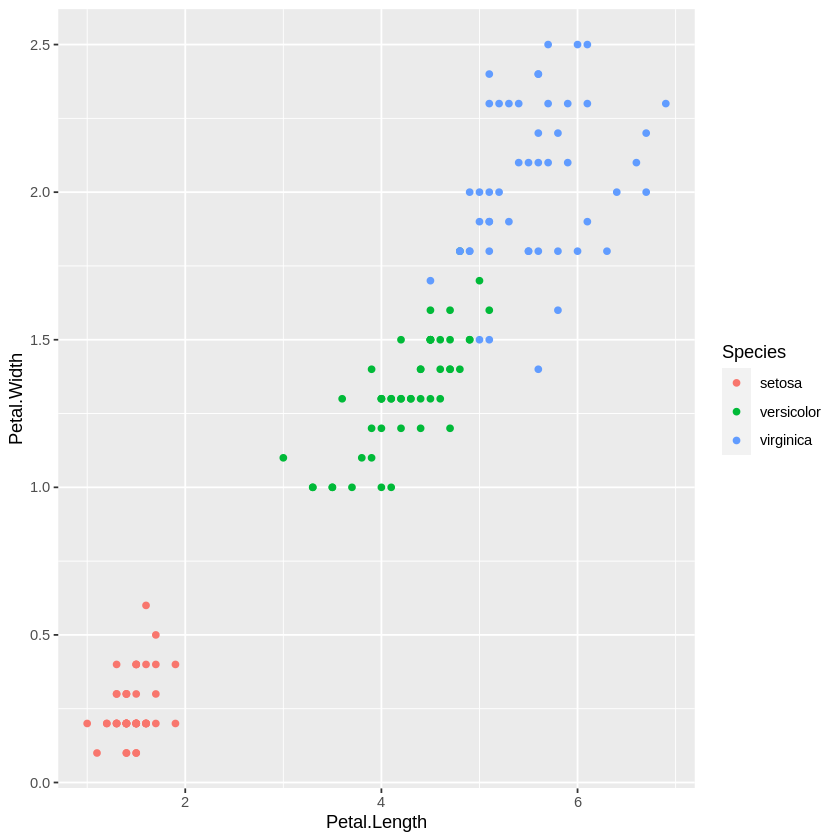

In [2]:
# Visually inspect the data on a graph

library(ggplot2)
qplot(Petal.Length,Petal.Width,colour=Species,data=iris_data)

In [3]:
# Install below packages for building a CART model.
library(rpart)
library(caret)

Loading required package: lattice



**Reference:** 

- [rpart](https://cran.r-project.org/web/packages/rpart/vignettes/longintro.pdf)
- [caret](https://cran.r-project.org/web/packages/caret/caret.pdf)
- [Tree based models](http://www.statmethods.net/advstats/cart.html)

Divide the population in to training and testing sets. 
Compare the predictive power of decision tree and random forest on testing set of data.

In [4]:
library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(iris_data$Species, SplitRatio=0.7)

training  = subset(iris_data, split==TRUE)
testing  = subset(iris_data, split==FALSE)
nrow(training)

nrow(testing)
head(training)

[1] 105

[1] 45

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


So we have 105 observations in training set and 45 in testing set.

Build a CART model. 
"caret" and "rpart" packages will be used to build the model.
To create a more graphically appealing graph in R, 
a package called “rattle” is used to make the decision tree. 
"Rattle" builds more fancy and clean trees which are easy to interpret.

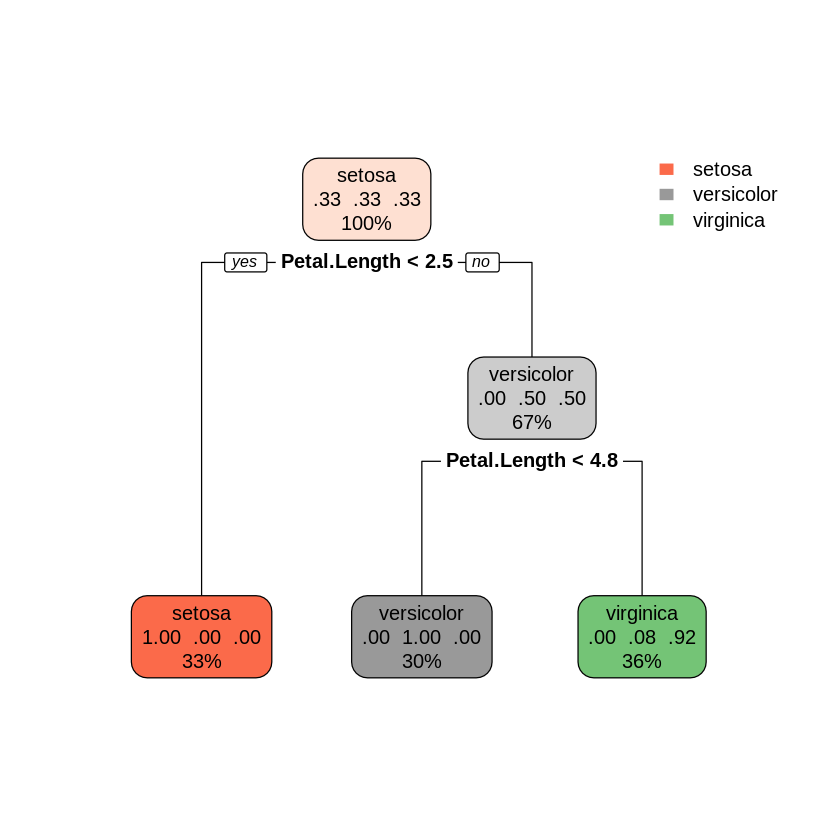

In [5]:
fit <- train(Species~.,method="rpart",data=training)

# Code for generating decision tree plot
rpart_fit <- rpart(Species~.,method="class",data=training) 
library(rpart.plot)
rpart.plot(rpart_fit)

Now we can test the predictive power of the CART model that is just built. 
Check for the number of misclassifications in the tree as the decision criteria.

In [6]:
train.pred <- predict(fit, newdata=training)

table(train.pred,training$Species)

            
train.pred   setosa versicolor virginica
  setosa         35          0         0
  versicolor      0         32         0
  virginica       0          3        35

In [7]:
# Misclassification rate = 4/105
3/105

[1] 0.02857143

There are 3 misclassifications out of 105 observations. 
The misclassification rate signifies its predictive power. 
Once the model is built, it should be validated on a test set to see how well it performs on unknown data. 
This will help in verifying the model is not over fit to the data. 
In case the model is over fitted, validation will show a sharp decline in the predictive power.

In [8]:
test.pred <- predict(fit, newdata=testing)

table(test.pred,testing$Species)

            
test.pred    setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         1
  virginica       0          3        14

In [9]:
# Misclassification rate = 3/45
4/45

[1] 0.08888889

The predictive power decreased in testing set as compared to training. 
This is generally true in most cases. 
The reason being, the model is trained on the training data set, and ideally generalized sufficient for the validation set.

### Random Forest

Now we will build a random forest model on iris_data to compare the results with CART model.

In [10]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


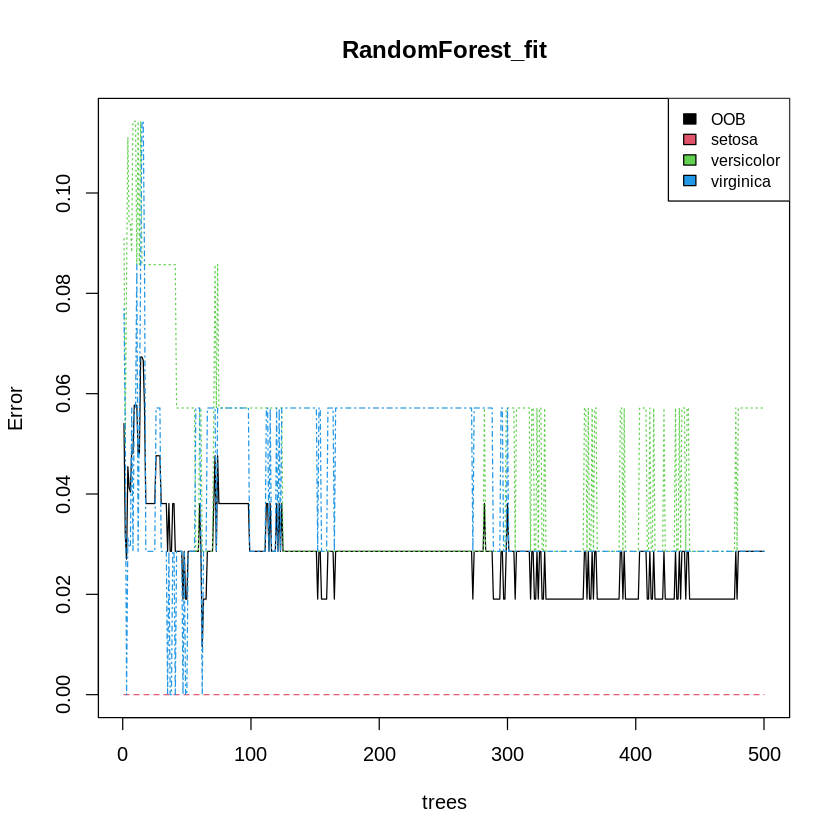

In [18]:
training
RandomForest_fit <- randomForest(Species~.,method="class",data=training,importance=TRUE) 


plot(RandomForest_fit)
legend("topright", colnames(RandomForest_fit$err.rate),col=1:4,cex=0.8,fill=1:4)

The plot shows the amount of error with the variation in the number of trees constructed. We can get a table of importance values for the variables. 

In [19]:
importance(RandomForest_fit)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,6.871987,0.5547562,9.692282,10.295128,6.212776
Sepal.Width,4.461926,2.7176073,2.591244,4.962074,1.658835
Petal.Length,22.683087,34.2766816,34.765861,39.062286,35.000766
Petal.Width,22.046873,26.1355649,23.528886,29.228045,26.372061


We can also plot the variable importance for the classification across the random forest.

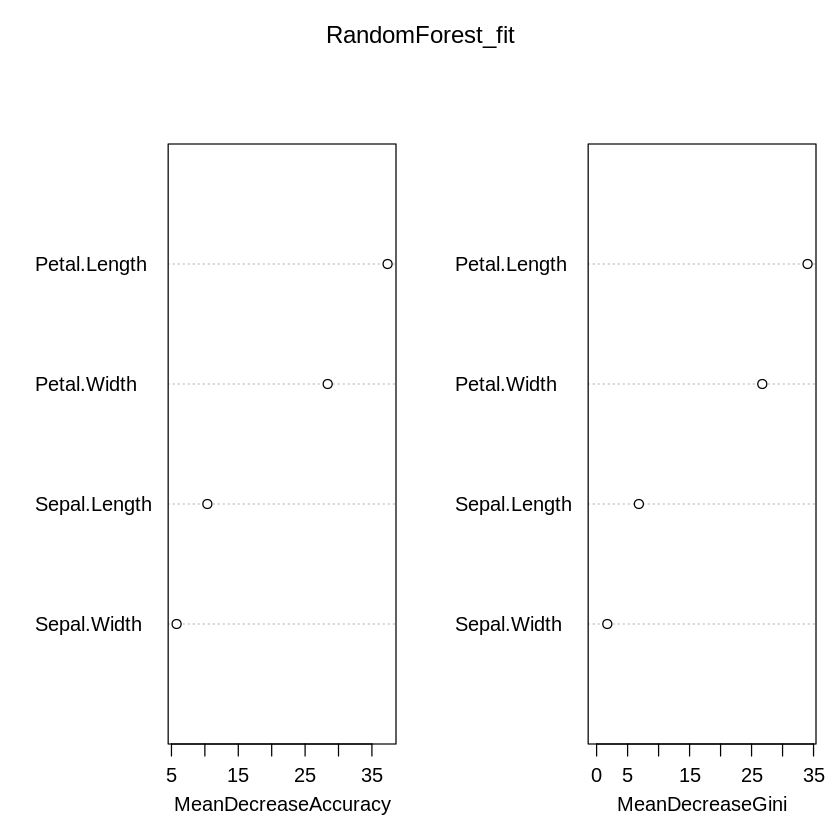

In [13]:
varImpPlot(RandomForest_fit)

#### Gini importance: 

Every time a split of a node is made on variable `m`, the gini impurity criterion for the two descendent nodes is less than the parent node. 
Adding up the gini decreases for each individual variable over all trees in the forest gives a 
fast variable importance that is often very consistent with the permutation importance measure. According to the plots, Petal.Length is the most important variable. 

**Reference:** [Variable importance](https://en.wikipedia.org/wiki/Random_forest#Variable_importance)

In [14]:
importance(RandomForest_fit)

,setosa,versicolor,virginica,MeanDecreaseAccuracy,MeanDecreaseGini
Sepal.Length,7.544932,-0.0776057,10.443142,10.370343,6.815523
Sepal.Width,5.282680,2.5267659,3.882174,5.769046,1.724336
Petal.Length,22.519747,32.5694235,33.974752,37.342698,34.034016
Petal.Width,22.782888,24.5742238,22.113020,28.380746,26.727391


In [15]:
RF_fit <- train(Species~ .,method="rf",data=training)

In [16]:
train_RF_pred <- predict(RF_fit,training)

In [17]:
table(train_RF_pred,training$Species)

             
train_RF_pred setosa versicolor virginica
   setosa         35          0         0
   versicolor      0         35         0
   virginica       0          0        35

Misclassification rate in training data is 0/105. Validate to make sure that the model is not over fitted on the training data by testing on tets data.

In [18]:
test_RF_pred<-predict(RF_fit,newdata=testing)

In [ ]:
table(test_RF_pred,testing$Species)

There are 2 misclassified observations out of 45, which is similar to CART model prediction power. 


### Measuring variable importance using Random Forests

#### Gini importance

It is the mean Gini gain that is produced by a feature over all trees. Consider `RF` is the Random Forest model fitted on the data. 

```R
RF <- randomForest(..., importance=TRUE)
```

There are 2 ways of checking the impoortance

* `RF$importance`       **column**: MeanDecreaseGini

* `importance(RF, type=2)`

Note: For variables of different types, there will be a bias in favor of continuous 
variables and variables with many categories.

#### Permutation importance
 
The mean decrease in classification accuracy after permuting the feature over all trees:

```R
RF <- randomForest(..., importance=TRUE)
```

- `RF$importance` **column**: MeanDecreaseAccuracy
- `importance(RF, type=1)`


Note: For variables of different types are unbiased only when subsampling is used as in   
`cforest(..., controls = cforest unbiased())`

**Note:** The below cell takes a minute or so to execute.